In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [2]:
candy_data_csv = Path("Resources/Candy_Sales.csv")

candy_df = pd.read_csv(candy_data_csv)
candy_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Country/Region,City,State/Province,Postal Code,Division,Region,Product ID,Product Name,Sales,Units,Gross Profit,Cost
0,282,US-2021-128055-CHO-TRI-54000,2021-03-31,2026-09-26,Standard Class,128055,United States,San Francisco,California,94122,Chocolate,Pacific,CHO-TRI-54000,Wonka Bar - Triple Dazzle Caramel,7.50,2,4.90,2.60
1,288,US-2021-128055-CHO-SCR-58000,2021-03-31,2026-09-26,Standard Class,128055,United States,San Francisco,California,94122,Chocolate,Pacific,CHO-SCR-58000,Wonka Bar -Scrumdiddlyumptious,7.20,2,5.00,2.20
2,1132,US-2021-138100-CHO-FUD-51000,2021-09-15,2027-03-13,Standard Class,138100,United States,New York City,New York,10011,Chocolate,Atlantic,CHO-FUD-51000,Wonka Bar - Fudge Mallows,7.20,2,4.80,2.40
3,1133,US-2021-138100-CHO-MIL-31000,2021-09-15,2027-03-13,Standard Class,138100,United States,New York City,New York,10011,Chocolate,Atlantic,CHO-MIL-31000,Wonka Bar - Milk Chocolate,9.75,3,6.33,3.42
4,3396,US-2022-121391-CHO-MIL-31000,2022-10-04,2028-03-29,First Class,121391,United States,San Francisco,California,94109,Chocolate,Pacific,CHO-MIL-31000,Wonka Bar - Milk Chocolate,6.50,2,4.22,2.28


In [5]:
# create 2-dataframes with the date ranges of V-day and Halloween
# date range:
    # halloween: October
    # v-day: February
    # within the date ranges determine which type of candy has most units purchased
    # rank these types from high > low
      

reduced_candy_df= candy_df.loc[:, ["Order Date", "Product Name",
                                    "Units"]]
reduced_candy_df.head()

,Order Date,Product Name,Units
0,2021-03-31,Wonka Bar - Triple Dazzle Caramel,2
1,2021-03-31,Wonka Bar -Scrumdiddlyumptious,2
2,2021-09-15,Wonka Bar - Fudge Mallows,2
3,2021-09-15,Wonka Bar - Milk Chocolate,3
4,2022-10-04,Wonka Bar - Milk Chocolate,2


In [7]:
reduced_by_dates = pd.DataFrame(reduced_candy_df)
reduced_by_dates["Order Date"] =  pd.to_datetime(reduced_by_dates["Order Date"])

# Extract the month from the 'date' column
reduced_by_dates["Month"] = reduced_by_dates["Order Date"].dt.month

reduced_by_dates.head()


,Order Date,Product Name,Units,Month
0,2021-03-31,Wonka Bar - Triple Dazzle Caramel,2,3
1,2021-03-31,Wonka Bar -Scrumdiddlyumptious,2,3
2,2021-09-15,Wonka Bar - Fudge Mallows,2,9
3,2021-09-15,Wonka Bar - Milk Chocolate,3,9
4,2022-10-04,Wonka Bar - Milk Chocolate,2,10


In [9]:
# index all February data by month
feb_index = reduced_by_dates[reduced_by_dates["Month"] == 2]

print(feb_index)

# reset the index for data manipulation
feb_index.reset_index(drop=True, inplace=True)

feb_index

      Order Date                       Product Name  Units  Month
13    2022-02-03  Wonka Bar - Triple Dazzle Caramel      2      2
14    2022-02-03  Wonka Bar - Nutty Crunch Surprise      3      2
56    2021-02-18          Wonka Bar - Fudge Mallows      2      2
88    2023-02-02  Wonka Bar - Triple Dazzle Caramel      2      2
143   2022-02-18  Wonka Bar - Nutty Crunch Surprise      3      2
...          ...                                ...    ...    ...
9928  2023-02-22          Wonka Bar - Fudge Mallows      5      2
9950  2022-02-28  Wonka Bar - Nutty Crunch Surprise      8      2
9951  2022-02-28  Wonka Bar - Triple Dazzle Caramel      2      2
10049 2022-02-06     Wonka Bar -Scrumdiddlyumptious      3      2
10054 2024-02-11          Wonka Bar - Fudge Mallows      7      2

[300 rows x 4 columns]


,Order Date,Product Name,Units,Month
0,2022-02-03,Wonka Bar - Triple Dazzle Caramel,2,2
1,2022-02-03,Wonka Bar - Nutty Crunch Surprise,3,2
2,2021-02-18,Wonka Bar - Fudge Mallows,2,2
3,2023-02-02,Wonka Bar - Triple Dazzle Caramel,2,2
4,2022-02-18,Wonka Bar - Nutty Crunch Surprise,3,2
...,...,...,...,...
295,2023-02-22,Wonka Bar - Fudge Mallows,5,2
296,2022-02-28,Wonka Bar - Nutty Crunch Surprise,8,2
297,2022-02-28,Wonka Bar - Triple Dazzle Caramel,2,2
298,2022-02-06,Wonka Bar -Scrumdiddlyumptious,3,2


In [11]:
# Copy Feb DF and delete Order Date column
feb_index_copy=feb_index.copy()
feb_index_copy.drop("Order Date", axis=1, inplace=True)
feb_index_copy

,Product Name,Units,Month
0,Wonka Bar - Triple Dazzle Caramel,2,2
1,Wonka Bar - Nutty Crunch Surprise,3,2
2,Wonka Bar - Fudge Mallows,2,2
3,Wonka Bar - Triple Dazzle Caramel,2,2
4,Wonka Bar - Nutty Crunch Surprise,3,2
...,...,...,...
295,Wonka Bar - Fudge Mallows,5,2
296,Wonka Bar - Nutty Crunch Surprise,8,2
297,Wonka Bar - Triple Dazzle Caramel,2,2
298,Wonka Bar -Scrumdiddlyumptious,3,2


In [13]:
# Groupy by and assemble the resulting series into a single summary DataFrame.
    # check februrary's count
    # delete Order Date Column
feb_reduce = feb_index_copy.groupby("Product Name")["Units"].sum()
print(feb_reduce)

feb_data = feb_reduce.sort_values(ascending=False)
feb_data


Product Name
Kazookles                             11
Lickable Wallpaper                    14
Wonka Bar - Fudge Mallows            184
Wonka Bar - Milk Chocolate           227
Wonka Bar - Nutty Crunch Surprise    203
Wonka Bar - Triple Dazzle Caramel    165
Wonka Bar -Scrumdiddlyumptious       239
Wonka Gum                             24
Name: Units, dtype: int64


Product Name
Wonka Bar -Scrumdiddlyumptious       239
Wonka Bar - Milk Chocolate           227
Wonka Bar - Nutty Crunch Surprise    203
Wonka Bar - Fudge Mallows            184
Wonka Bar - Triple Dazzle Caramel    165
Wonka Gum                             24
Lickable Wallpaper                    14
Kazookles                             11
Name: Units, dtype: int64

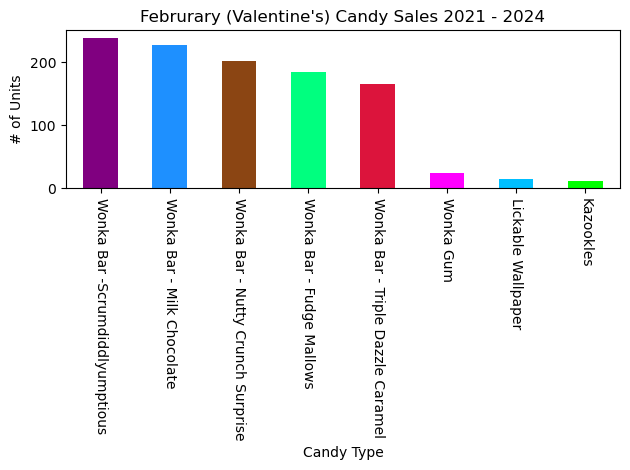

In [15]:
# plot the data
feb_data.plot(kind="bar", 
                          title="Februrary (Valentine's) Candy Sales 2021 - 2024",
                          color=["purple", "dodgerblue","saddlebrown", "springgreen", "crimson", "magenta",
                                 "deepskyblue",  "lime"])
plt.xlabel("Candy Type")
plt.ylabel("# of Units")
plt.tight_layout()
plt.xticks(rotation=-90)
plt.savefig("feb_stats.png")

In [17]:
# index all October data by month
oct_index = reduced_by_dates[reduced_by_dates["Month"] == 10]
print(oct_index)

# reset the index for data manipulation
oct_index.reset_index(drop=True, inplace=True)
oct_index

      Order Date                       Product Name  Units  Month
4     2022-10-04         Wonka Bar - Milk Chocolate      2     10
12    2021-10-24         Wonka Bar - Milk Chocolate      3     10
133   2023-10-23  Wonka Bar - Nutty Crunch Surprise      5     10
155   2021-10-31          Wonka Bar - Fudge Mallows      8     10
162   2024-10-03          Wonka Bar - Fudge Mallows      2     10
...          ...                                ...    ...    ...
10130 2024-10-09          Wonka Bar - Fudge Mallows      5     10
10154 2021-10-13         Wonka Bar - Milk Chocolate      5     10
10155 2021-10-13         Wonka Bar - Milk Chocolate      4     10
10156 2021-10-13  Wonka Bar - Nutty Crunch Surprise      4     10
10157 2021-10-13         Wonka Bar - Milk Chocolate      2     10

[843 rows x 4 columns]


,Order Date,Product Name,Units,Month
0,2022-10-04,Wonka Bar - Milk Chocolate,2,10
1,2021-10-24,Wonka Bar - Milk Chocolate,3,10
2,2023-10-23,Wonka Bar - Nutty Crunch Surprise,5,10
3,2021-10-31,Wonka Bar - Fudge Mallows,8,10
4,2024-10-03,Wonka Bar - Fudge Mallows,2,10
...,...,...,...,...
838,2024-10-09,Wonka Bar - Fudge Mallows,5,10
839,2021-10-13,Wonka Bar - Milk Chocolate,5,10
840,2021-10-13,Wonka Bar - Milk Chocolate,4,10
841,2021-10-13,Wonka Bar - Nutty Crunch Surprise,4,10


In [19]:
# Copy October DF and delete Order Date column
oct_index_copy=oct_index.copy()
oct_index_copy.drop("Order Date", axis=1, inplace=True)
oct_index_copy

,Product Name,Units,Month
0,Wonka Bar - Milk Chocolate,2,10
1,Wonka Bar - Milk Chocolate,3,10
2,Wonka Bar - Nutty Crunch Surprise,5,10
3,Wonka Bar - Fudge Mallows,8,10
4,Wonka Bar - Fudge Mallows,2,10
...,...,...,...
838,Wonka Bar - Fudge Mallows,5,10
839,Wonka Bar - Milk Chocolate,5,10
840,Wonka Bar - Milk Chocolate,4,10
841,Wonka Bar - Nutty Crunch Surprise,4,10


In [21]:
# Groupy by and assemble the resulting series into a single summary DataFrame.

oct_reduce = oct_index_copy.groupby("Product Name")["Units"].sum()
print(oct_reduce)

oct_data = oct_reduce.sort_values(ascending=False)
oct_data

Product Name
Everlasting Gobstopper                 6
Hair Toffee                            2
Kazookles                             19
Lickable Wallpaper                    60
SweeTARTS                              7
Wonka Bar - Fudge Mallows            643
Wonka Bar - Milk Chocolate           639
Wonka Bar - Nutty Crunch Surprise    528
Wonka Bar - Triple Dazzle Caramel    621
Wonka Bar -Scrumdiddlyumptious       616
Wonka Gum                             32
Name: Units, dtype: int64


Product Name
Wonka Bar - Fudge Mallows            643
Wonka Bar - Milk Chocolate           639
Wonka Bar - Triple Dazzle Caramel    621
Wonka Bar -Scrumdiddlyumptious       616
Wonka Bar - Nutty Crunch Surprise    528
Lickable Wallpaper                    60
Wonka Gum                             32
Kazookles                             19
SweeTARTS                              7
Everlasting Gobstopper                 6
Hair Toffee                            2
Name: Units, dtype: int64

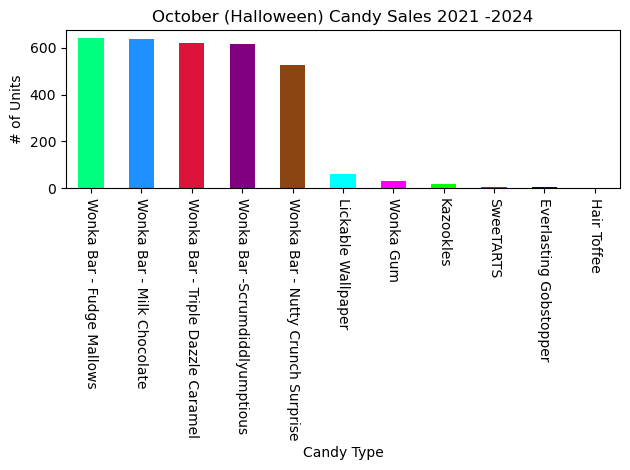

In [23]:
# plot the data
oct_chart = oct_data.plot(kind="bar", title="October (Halloween) Candy Sales 2021 -2024",
                         color=["springgreen", "dodgerblue","crimson", "purple", "saddlebrown", "cyan",
                                 "magenta",  "lime", "red", "navy","maroon"])
plt.xlabel("Candy Type")
plt.ylabel("# of Units")
plt.tight_layout()
plt.xticks(rotation=-90)
plt.savefig("oct_stats.png")

In [25]:
# Aidan's CODE
# Clean Data
#Reduced matrix for Aidan
candy_df_aidan = candy_df.loc[:, ["Product Name", "Sales", "Units", "Gross Profit", "Cost"]]
candy_df_aidan.head()

,Product Name,Sales,Units,Gross Profit,Cost
0,Wonka Bar - Triple Dazzle Caramel,7.50,2,4.90,2.60
1,Wonka Bar -Scrumdiddlyumptious,7.20,2,5.00,2.20
2,Wonka Bar - Fudge Mallows,7.20,2,4.80,2.40
3,Wonka Bar - Milk Chocolate,9.75,3,6.33,3.42
4,Wonka Bar - Milk Chocolate,6.50,2,4.22,2.28


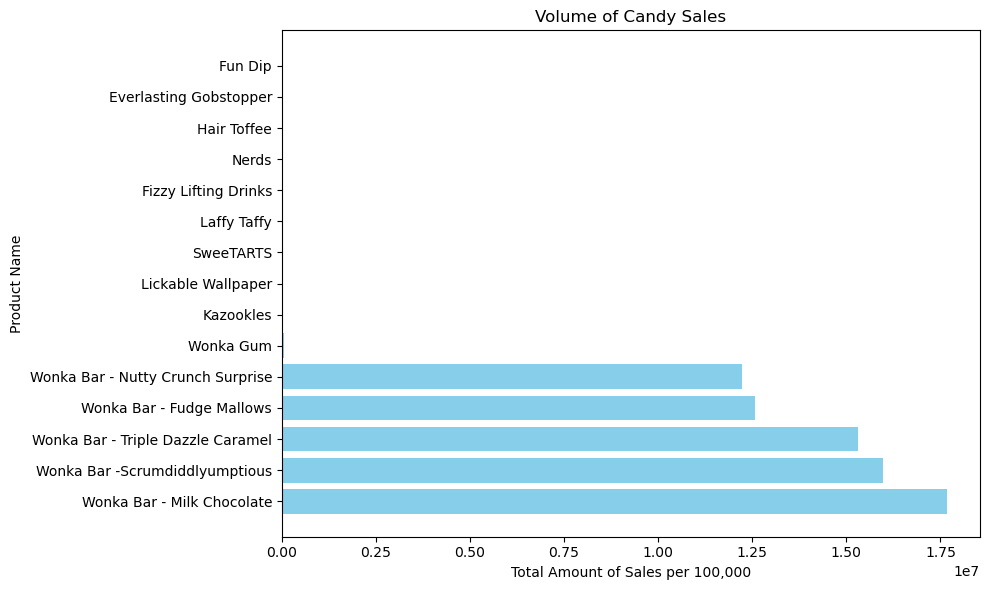

In [27]:
# Volume Vs. Cost (Aidan)

#Count total volume per product
# Count the occurrences of each product
# Assuming the column name for products is 'Product'
product_counts = candy_df_aidan['Product Name'].value_counts().reset_index()

# Rename the columns for clarity
#product_counts.columns = ['Product Name', 'Count']
product_units = candy_df_aidan.groupby('Product Name')['Units'].sum().reset_index()

# Count the occurrences of each product
product_counts = candy_df_aidan['Product Name'].value_counts().reset_index()

# Rename the columns for clarity
product_counts.columns = ['Product Name', 'Count']

# Merge the counts with the summed units
result = pd.merge(product_counts, product_units, on='Product Name')

# Calculate the total sales by multiplying Count by Units
result['Total Sales'] = result['Count'] * result['Units']

# Display the result
plt.figure(figsize=(10, 6))
plt.barh(result['Product Name'], result['Total Sales'], color='skyblue')
plt.ylabel('Product Name')
plt.xlabel('Total Amount of Sales per 100,000')
plt.title('Volume of Candy Sales')

plt.tight_layout()  # Adjust layout for better fit
plt.show()

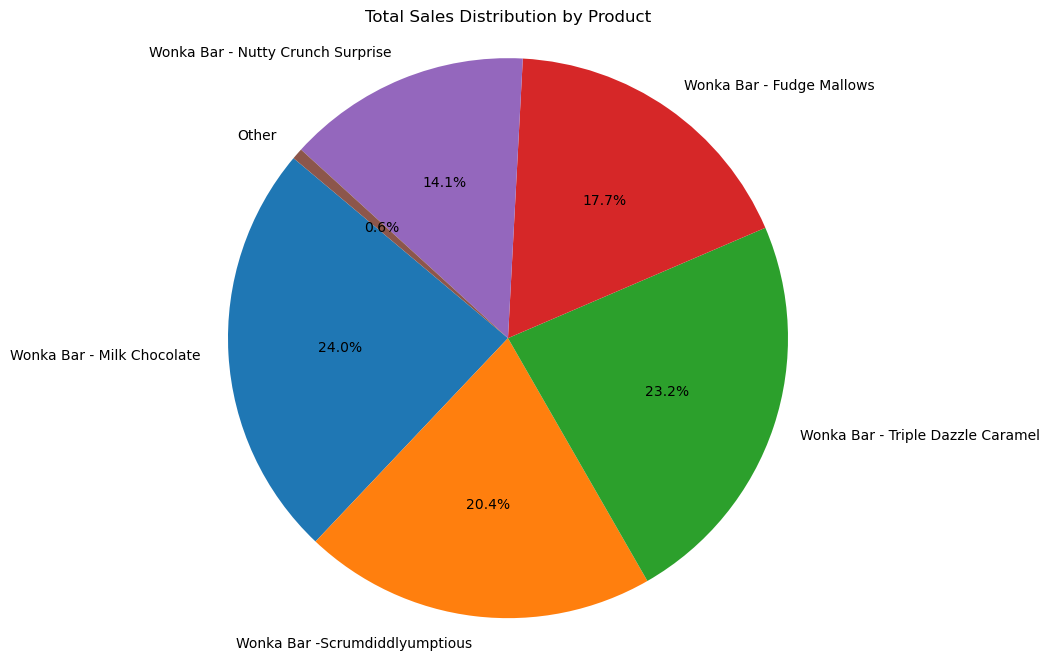

In [29]:
#visualization for dollar amount of sales per candy bar
money_counts = candy_df_aidan['Product Name'].value_counts().reset_index()
money_counts.columns = ['Product Name', 'Count']

# Calculate total units per product
units_per_product = candy_df_aidan.groupby('Product Name')['Units'].sum().reset_index()
units_per_product.columns = ['Product Name', 'Total Units']

# Assuming the column name for price is 'Price'
# Calculate total sales for each product
price_per_product = candy_df_aidan.groupby('Product Name')['Cost'].mean().reset_index()
price_per_product.columns = ['Product Name', 'Average Price']

# Merge all data together
result = pd.merge(product_counts, units_per_product, on='Product Name')
result = pd.merge(result, price_per_product, on='Product Name')

# Calculate the total sales by multiplying Count, Total Units, and Average Price
result['Total Sales'] = result['Count'] * result['Total Units'] * result['Average Price']

# Display the result
threshold = 0.05 * result['Total Sales'].sum()
other_sales = result[result['Total Sales'] < threshold]
main_sales = result[result['Total Sales'] >= threshold]

# Combine smaller slices into 'Other'
if not other_sales.empty:
    other_row = pd.DataFrame({
        'Product Name': ['Other'],
        'Total Sales': [other_sales['Total Sales'].sum()]
    })
    final_result = pd.concat([main_sales[['Product Name', 'Total Sales']], other_row], ignore_index=True)
else:
    final_result = main_sales[['Product Name', 'Total Sales']]

# Create a pie chart
plt.figure(figsize=(10, 8))
plt.pie(final_result['Total Sales'], labels=final_result['Product Name'], autopct='%1.1f%%', startangle=140)
plt.title('Total Sales Distribution by Product')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

In [31]:
# Bianca's Code
#list all columns in table
candy_df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Country/Region', 'City', 'State/Province',
       'Postal Code', 'Division', 'Region', 'Product ID', 'Product Name',
       'Sales', 'Units', 'Gross Profit', 'Cost'],
      dtype='object')

In [33]:
#new table using colums Division, State/Province, Units)
state_df= candy_df[["Division","State/Province","Gross Profit"]]
state_df.head()

,Division,State/Province,Gross Profit
0,Chocolate,California,4.90
1,Chocolate,California,5.00
2,Chocolate,New York,4.80
3,Chocolate,New York,6.33
4,Chocolate,California,4.22


In [35]:
#groupby for candy units
per_candy_unit = state_df.groupby(["Division","State/Province"])[["Gross Profit"]].sum().reset_index()
#per_candy_unit.loc[per_candy_unit["State/Province"]== "California"]
per_candy_unit.head()

,Division,State/Province,Gross Profit
0,Chocolate,Alabama,544.16
1,Chocolate,Alberta,236.30
2,Chocolate,Arizona,1944.61
3,Chocolate,Arkansas,556.07
4,Chocolate,British Columbia,198.30


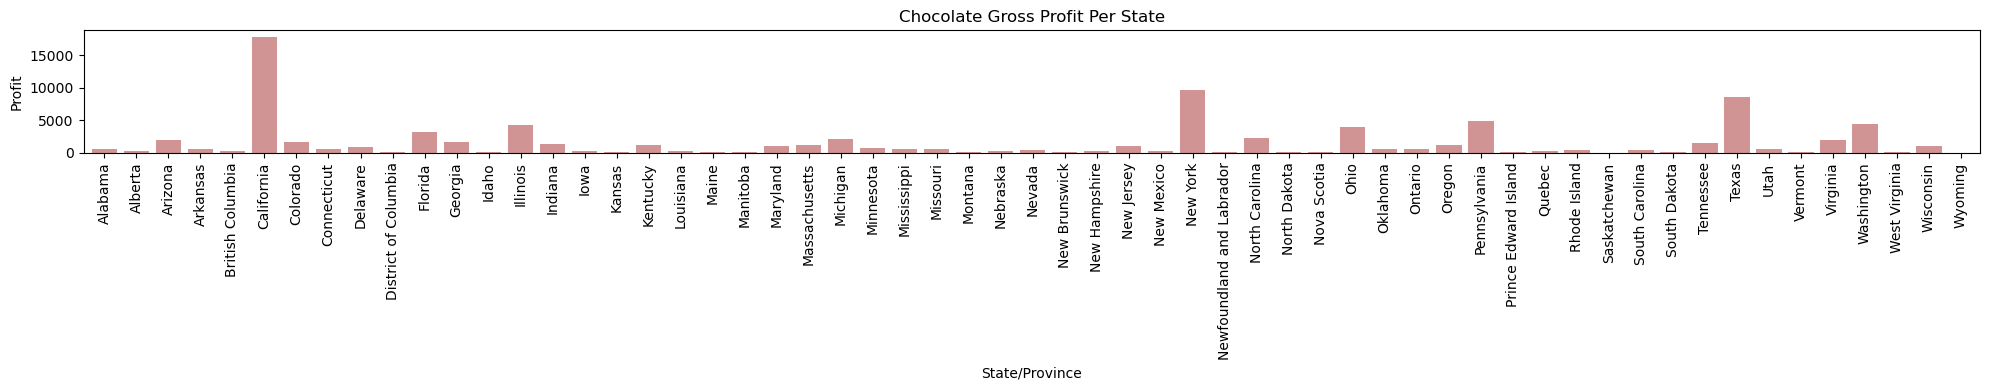

In [41]:
#create visulizaton
#create bar chart for chocolate units
chocolate_df=per_candy_unit.loc[per_candy_unit["Division"]=="Chocolate"]

x_axis= np.arange(len(chocolate_df))
tick_locations=[value+0.4 for value in x_axis]

plt.figure(figsize=(20,4))
plt.bar(x_axis, chocolate_df["Gross Profit"], color="brown", alpha=0.5, align="edge")
plt.xticks(tick_locations, chocolate_df["State/Province"], rotation="vertical")
plt.xlim(-0.25, len(x_axis))
plt.ylim(0, max(chocolate_df["Gross Profit"])+1000)
plt.title("Chocolate Gross Profit Per State")
plt.xlabel("State/Province")
plt.ylabel("Profit")
plt.tight_layout()
plt.savefig("chocolate_profit.png") #<<< Threw an error with original directory***
plt.show()

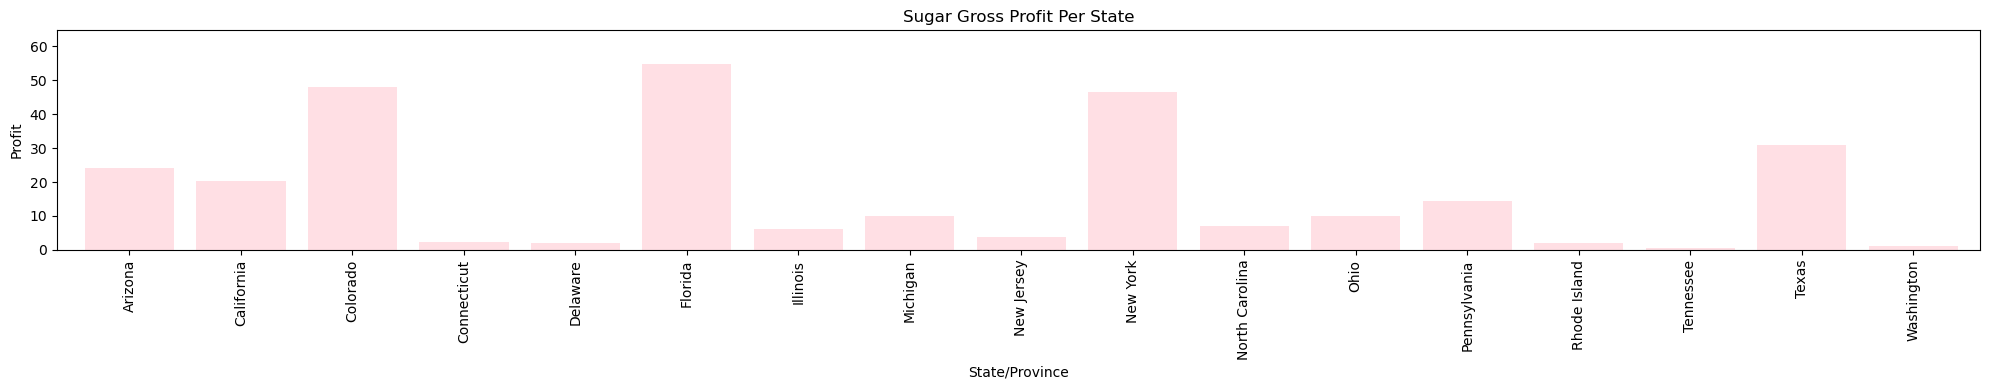

In [43]:
#create bar chart for sugar units
sugar_df=per_candy_unit.loc[per_candy_unit["Division"]=="Sugar"]

x_axis= np.arange(len(sugar_df))
tick_locations=[value+0.4 for value in x_axis]

plt.figure(figsize=(20,4))
plt.bar(x_axis, sugar_df["Gross Profit"], color="pink", alpha=0.5, align="edge")
plt.xticks(tick_locations, sugar_df["State/Province"], rotation="vertical")
plt.xlim(-0.25, len(x_axis))
plt.ylim(0, max(sugar_df["Gross Profit"])+10)
plt.title("Sugar Gross Profit Per State")
plt.xlabel("State/Province")
plt.ylabel("Profit")
plt.tight_layout()
plt.savefig("sugar_profit.png")
plt.show()

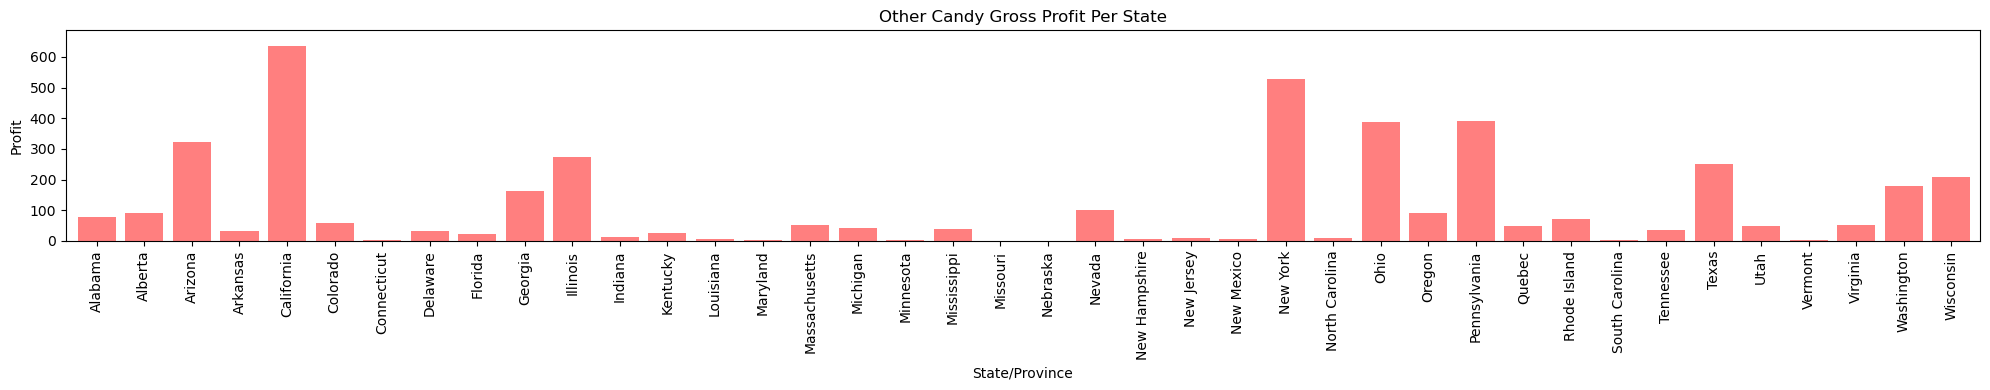

In [47]:
# create bar chart for other candy
other_candy_df=per_candy_unit.loc[per_candy_unit["Division"]=="Other"]

x_axis= np.arange(len(other_candy_df))
tick_locations=[value+0.4 for value in x_axis]

plt.figure(figsize=(20,4))
plt.bar(x_axis, other_candy_df["Gross Profit"], color="red", alpha=0.5, align="edge")
plt.xticks(tick_locations, other_candy_df["State/Province"], rotation="vertical")
plt.xlim(-0.25, len(x_axis))
plt.ylim(0, max(other_candy_df["Gross Profit"])+50)
plt.title("Other Candy Gross Profit Per State")
plt.xlabel("State/Province")
plt.ylabel("Profit")
plt.tight_layout()
plt.savefig("other_candy_profit.png")
plt.show()

In [49]:
# Jose's CODE
# Clean Data
# Reduced matrix for Jose Moncada
candy_df_jose = candy_df.loc[:, ["Order Date", "Product Name", "Sales", "Units", "Gross Profit", "Cost"]]
candy_df_jose.head()

,Order Date,Product Name,Sales,Units,Gross Profit,Cost
0,2021-03-31,Wonka Bar - Triple Dazzle Caramel,7.50,2,4.90,2.60
1,2021-03-31,Wonka Bar -Scrumdiddlyumptious,7.20,2,5.00,2.20
2,2021-09-15,Wonka Bar - Fudge Mallows,7.20,2,4.80,2.40
3,2021-09-15,Wonka Bar - Milk Chocolate,9.75,3,6.33,3.42
4,2022-10-04,Wonka Bar - Milk Chocolate,6.50,2,4.22,2.28


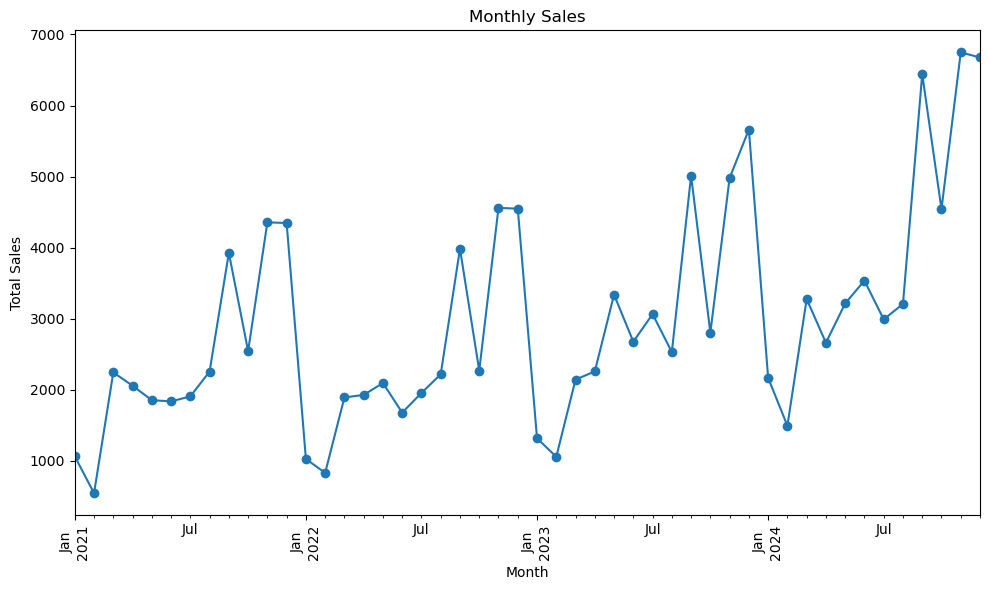

In [51]:
# Which Season Wins (Jose)
#Monthly Sales from 2021 to 2024

# Convert "Order Date" to datetime format
candy_df_jose["Order Date"] = pd.to_datetime(candy_df_jose["Order Date"])

# Extract year and month
candy_df_jose["Year-Month"] = candy_df_jose["Order Date"].dt.to_period("M")

# Group by "Year-Month" and sum the sales for each month
monthly_sales = candy_df_jose.groupby("Year-Month")["Sales"].sum()

# Plot the monthly sales
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind="line", marker="o")
plt.title("Monthly Sales")
plt.xlabel("Month")
plt.ylabel("Total Sales")
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()
plt.show()

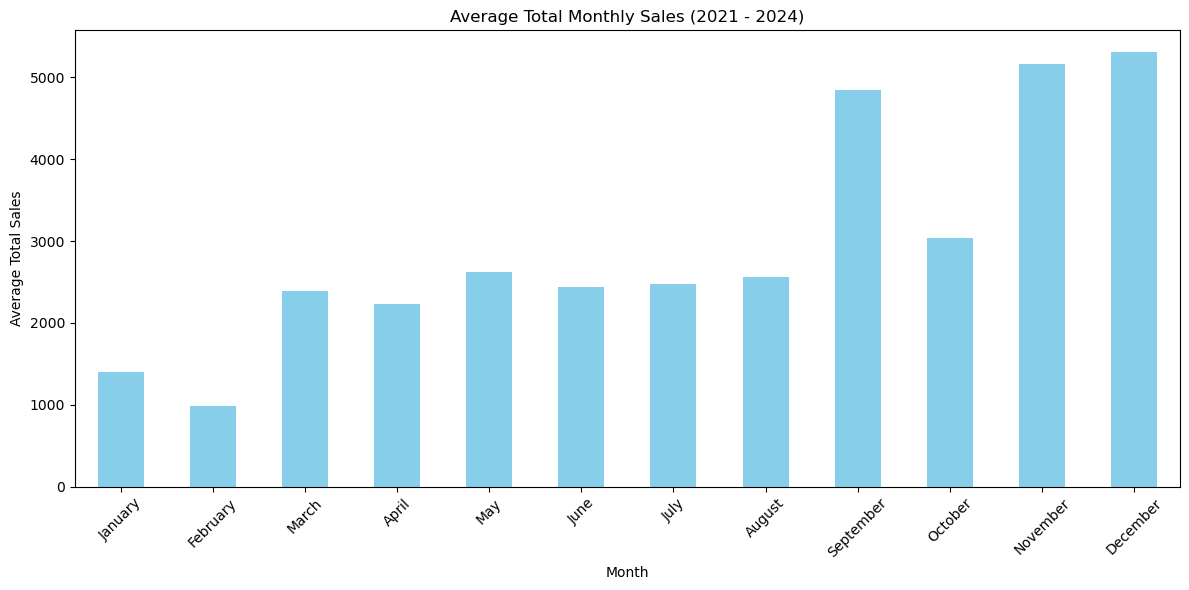

In [53]:
# Extract the month and year from the "Order Date"
candy_df_jose["Month"] = candy_df_jose["Order Date"].dt.month
candy_df_jose["Year"] = candy_df_jose["Order Date"].dt.year

# Group by year and month to calculate total sales
monthly_sales = candy_df_jose.groupby(["Year", "Month"])["Sales"].sum().reset_index()

# Group by month to calculate the average of total sales for each month across years
average_monthly_sales = monthly_sales.groupby("Month")["Sales"].mean()

# Create a list of month names for better labeling
month_names = [
    "January", "February", "March", "April", "May", 
    "June", "July", "August", "September", "October", 
    "November", "December"
]

# Reindex the average monthly sales to match the month names
average_monthly_sales.index = month_names

# Plot the average monthly sales
plt.figure(figsize=(12, 6))
average_monthly_sales.plot(kind="bar", color="skyblue")

# Set title and labels
plt.title("Average Total Monthly Sales (2021 - 2024)")
plt.xlabel("Month")
plt.ylabel("Average Total Sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [93]:
# Order Date Column used for Season Data
#Spring - March - April - May
#Summer - June - Juy - August
#Fall - September - October - November
#Winter - December - January - February

# Define the desired order of seasons
season_order = ["Spring", "Summer", "Fall", "Winter"]

# Reindex seasonal_sales to match the desired order
seasonal_sales = seasonal_sales.reindex(season_order)

# Plot the seasonal sales
plt.figure(figsize=(10, 6))
seasonal_sales.plot(kind="bar", color=["lightgreen", "orange", "brown", "lightblue"])

# Set title and labels
plt.title("Sales by Season")
plt.xlabel("Season")
plt.ylabel("Total Sales")
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

NameError: name 'seasonal_sales' is not defined

In [59]:
# Nick's CODE

candy_sales_df=pd.read_csv(candy_data_csv)

In [61]:
# Trends over time (Nicholas)
candy_sales_df["Order Date"] = pd.to_datetime(candy_sales_df["Order Date"])
candy_sales_df["Year"] = candy_sales_df["Order Date"].dt.year
division_year_summary = candy_sales_df.groupby(["Division", "Year"]).agg(
    Total_Sales=("Sales", "sum"),
    Total_Gross_Profit=("Gross Profit", "sum")
).reset_index()
division_year_summary

,Division,Year,Total_Sales,Total_Gross_Profit
0,Chocolate,2021,26356.36,17759.68
1,Chocolate,2022,27763.20,18711.66
2,Chocolate,2023,34193.38,23090.44
3,Chocolate,2024,43379.96,29262.84
4,Other,2021,2549.25,1155.45
5,Other,2022,1207.75,479.55
6,Other,2023,2461.75,1103.95
7,Other,2024,3444.50,1594.50
8,Sugar,2021,47.94,27.24
9,Sugar,2022,31.70,17.85


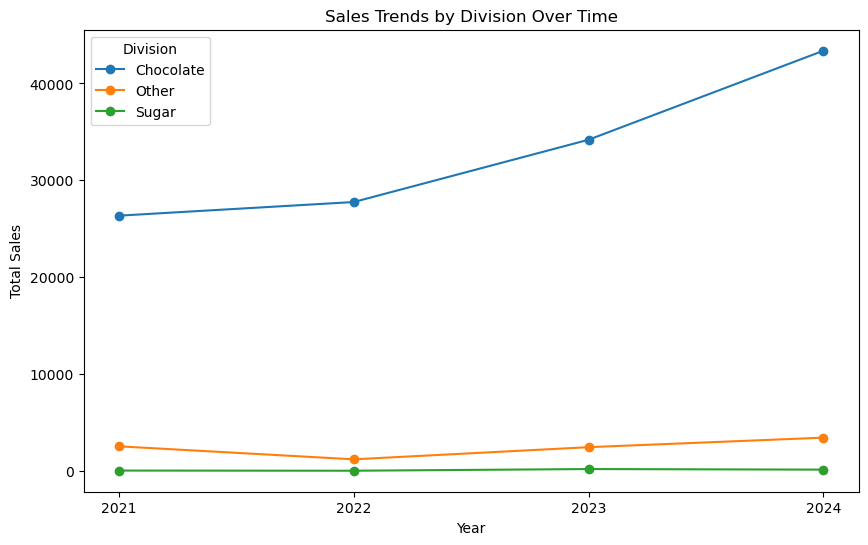

In [63]:
pivot_division_year_summary= division_year_summary.pivot(index="Year", columns="Division", values="Total_Sales")
pivot_division_year_summary.plot(kind="line", figsize=(10, 6), marker='o')

plt.title("Sales Trends by Division Over Time")
plt.xlabel("Year")
plt.ylabel("Total Sales")
plt.xticks([2021, 2022, 2023, 2024])  
plt.legend(title="Division")
plt.show()

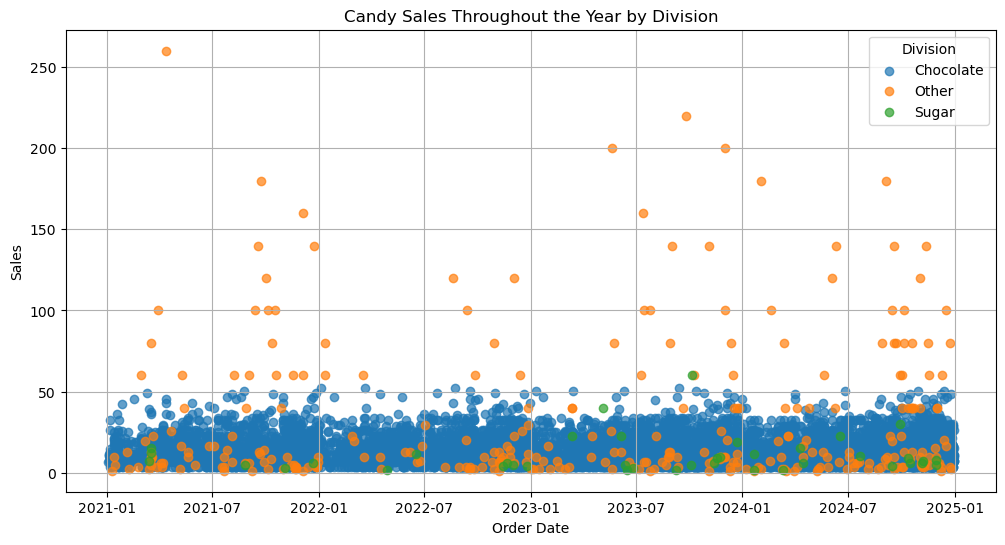

In [65]:
candy_sales_df['Year'] = candy_sales_df['Order Date'].dt.year
plt.figure(figsize=(12, 6))
for division in candy_sales_df['Division'].unique():
    division_data = candy_sales_df[candy_sales_df['Division'] == division]
    plt.scatter(division_data['Order Date'], division_data['Sales'], label=division, alpha=0.7)
    plt.title("Candy Sales Throughout the Year by Division")
plt.xlabel("Order Date")
plt.ylabel("Sales")
plt.legend(title="Division")
plt.grid(True)
plt.show()

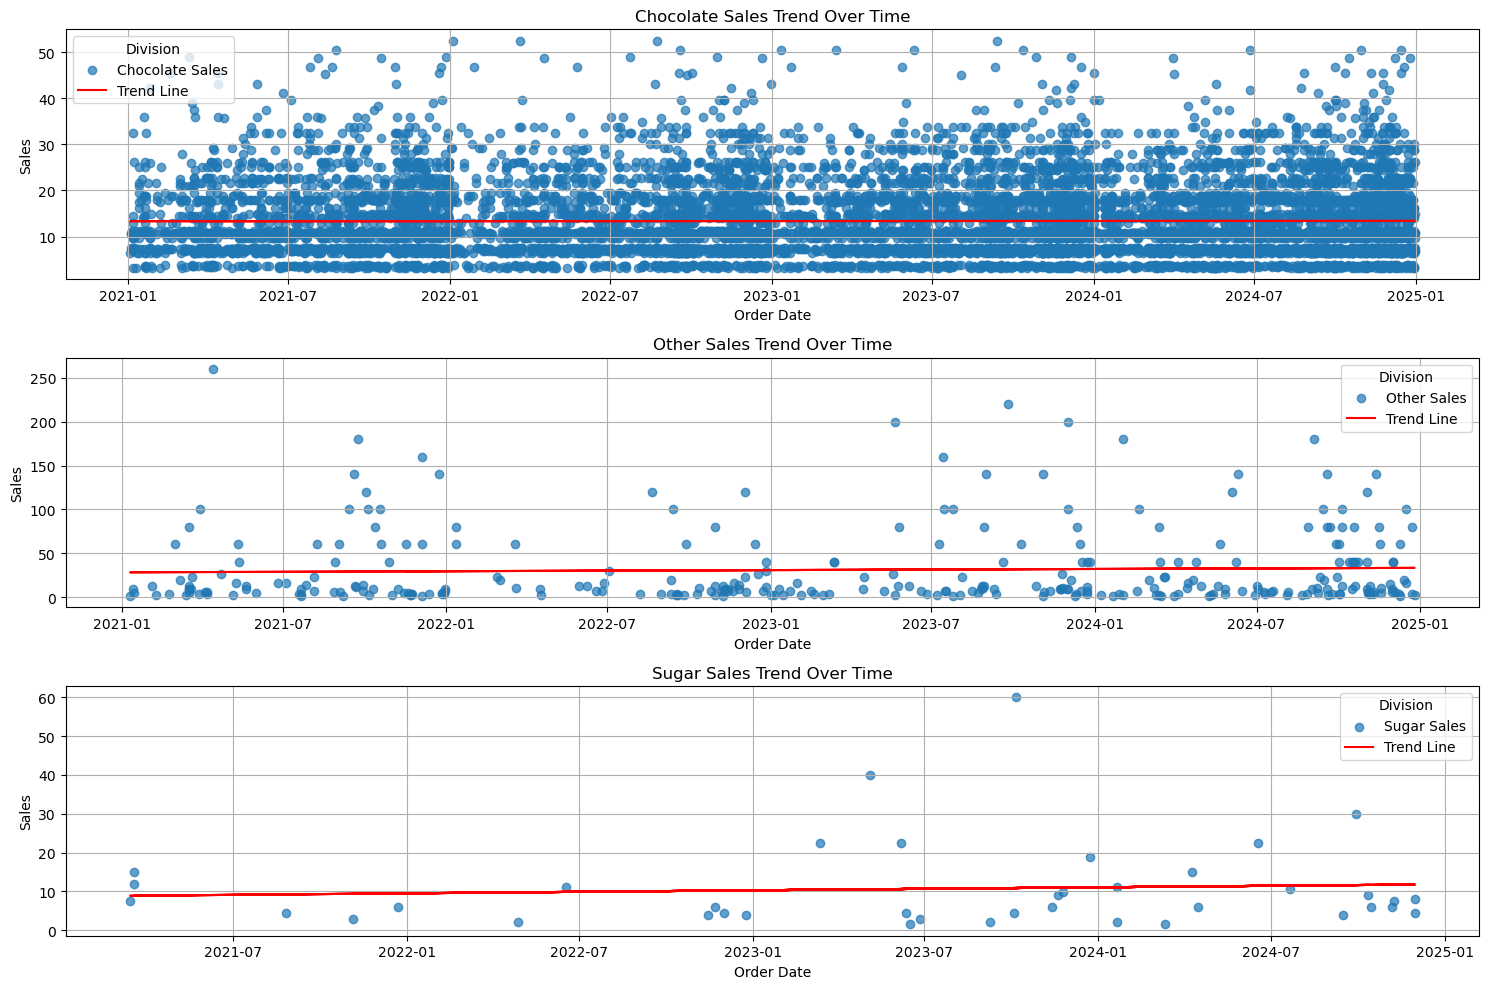

Chocolate - Slope of the trend line: 4.718657768127446e-05, P-value: 0.8028964172121391
Other - Slope of the trend line: 0.0035155632331708465, P-value: 0.52722891353762
Sugar - Slope of the trend line: 0.0021267653806000433, P-value: 0.6492179873298614


In [67]:
from scipy.stats import linregress
divisions = candy_sales_df['Division'].unique()

# Create a plot for each division
plt.figure(figsize=(15, 10))

for i, division in enumerate(divisions):
    # Filter data for the current division
    division_data = candy_sales_df[candy_sales_df['Division'] == division].copy()
    
    # Ensure 'Order Date' is in datetime format
    division_data['Order Date'] = pd.to_datetime(division_data['Order Date'], errors='coerce')

    # Check for NaN values and drop them
    division_data = division_data.dropna(subset=['Order Date', 'Sales'])

    # Create a new column for ordinal dates
    division_data['Date_ordinal'] = division_data['Order Date'].map(pd.Timestamp.toordinal)

    # Calculate the linear regression
    slope, intercept, r_value, p_value, std_err = linregress(division_data['Date_ordinal'], division_data['Sales'])

    # Create a subplot for each division
    plt.subplot(len(divisions), 1, i + 1)  # Adjust for the number of divisions
    plt.scatter(division_data['Order Date'], division_data['Sales'], label=f"{division} Sales", alpha=0.7)
    plt.plot(division_data['Order Date'], intercept + slope * division_data['Date_ordinal'], color="red", label="Trend Line")
    plt.title(f"{division} Sales Trend Over Time")
    plt.xlabel("Order Date")
    plt.ylabel("Sales")
    plt.legend(title="Division")
    plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()

# Print slopes and p-values for each division
for division in divisions:
    division_data = candy_sales_df[candy_sales_df['Division'] == division].copy()
    division_data['Order Date'] = pd.to_datetime(division_data['Order Date'], errors='coerce')
    division_data = division_data.dropna(subset=['Order Date', 'Sales'])
    division_data['Date_ordinal'] = division_data['Order Date'].map(pd.Timestamp.toordinal)
    
    slope, intercept, r_value, p_value, std_err = linregress(division_data['Date_ordinal'], division_data['Sales'])
    print(f"{division} - Slope of the trend line: {slope}, P-value: {p_value}")

In [69]:
# Yvette's CODE
import os
print(os.getcwd())

C:\Users\Rich.Homie_DOM\DA_Weekly_Activities\UTA-VIRT-DATA-PT-09-2024-U-LOLC\Project 1\Project_1


In [73]:
candy_data = pd.read_csv(candy_data_csv)

In [75]:
candy_data.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Country/Region,City,State/Province,Postal Code,Division,Region,Product ID,Product Name,Sales,Units,Gross Profit,Cost
0,282,US-2021-128055-CHO-TRI-54000,2021-03-31,2026-09-26,Standard Class,128055,United States,San Francisco,California,94122,Chocolate,Pacific,CHO-TRI-54000,Wonka Bar - Triple Dazzle Caramel,7.5,2,4.9,2.6
1,288,US-2021-128055-CHO-SCR-58000,2021-03-31,2026-09-26,Standard Class,128055,United States,San Francisco,California,94122,Chocolate,Pacific,CHO-SCR-58000,Wonka Bar -Scrumdiddlyumptious,7.2,2,5.0,2.2


In [77]:
candy_data_clean = candy_data[["Order Date", "Country/Region", "State/Province", "Division", "Product Name", "Units", "Gross Profit"]]
candy_data_clean.head(2)

,Order Date,Country/Region,State/Province,Division,Product Name,Units,Gross Profit
0,2021-03-31,United States,California,Chocolate,Wonka Bar - Triple Dazzle Caramel,2,4.9
1,2021-03-31,United States,California,Chocolate,Wonka Bar -Scrumdiddlyumptious,2,5.0


In [79]:
candy_data_clean = candy_data_clean.copy()
candy_data_clean["Total Gross Profits"] = candy_data_clean["Units"] * candy_data_clean["Gross Profit"] * 1000
candy_data_clean.head(2)

,Order Date,Country/Region,State/Province,Division,Product Name,Units,Gross Profit,Total Gross Profits
0,2021-03-31,United States,California,Chocolate,Wonka Bar - Triple Dazzle Caramel,2,4.9,9800.0
1,2021-03-31,United States,California,Chocolate,Wonka Bar -Scrumdiddlyumptious,2,5.0,10000.0


In [81]:
candy_data_division = candy_data_clean.set_index("Order Date")[["State/Province", "Division", "Total Gross Profits"]]
candy_data_division.head(2)

,State/Province,Division,Total Gross Profits
Order Date,,,
2021-03-31,California,Chocolate,9800.0
2021-03-31,California,Chocolate,10000.0


In [83]:
per_state_candy_division = candy_data_division.groupby(["State/Province", "Division"])["Total Gross Profits"].sum().reset_index()
per_state_candy_division.head(3)

,State/Province,Division,Total Gross Profits
0,Alabama,Chocolate,3103180.0
1,Alabama,Other,347850.0
2,Alberta,Chocolate,1188540.0


In [85]:
state_to_region = {
    "Connecticut": "Northeast", "Maine": "Northeast", "Massachusetts": "Northeast",
    "New Hampshire": "Northeast", "Rhode Island": "Northeast", "Vermont": "Northeast",
    "New Jersey": "Mid Atlantic", "New York": "Northeast", "Pennsylvania": "Mid Atlantic",
    "Illinois": "Midwest", "Indiana": "Midwest", "Michigan": "Midwest",
    "Ohio": "Midwest", "Wisconsin": "Midwest", "Iowa": "Midwest",
    "Kansas": "Midwest", "Minnesota": "Midwest", "Missouri": "Midwest",
    "Nebraska": "Midwest", "North Dakota": "Midwest", "South Dakota": "Midwest",
    "Delaware": "Mid Atlantic", "Florida": "South", "Georgia": "South",
    "Maryland": "Mid Atlantic", "North Carolina": "South", "South Carolina": "South",
    "Virginia": "Mid Atlantic", "West Virginia": "South", "Alabama": "South",
    "Kentucky": "South", "Mississippi": "South", "Tennessee": "South",
    "Arkansas": "South", "Louisiana": "South", "Oklahoma": "Southwest",
    "Texas": "Southwest", "Arizona": "Southwest", "Colorado": "Pacific",
    "Idaho": "Pacific", "Montana": "Pacific", "Nevada": "Southwest",
    "New Mexico": "Southwest", "Utah": "Pacific", "Wyoming": "Pacific",
    "California": "Pacific", "Oregon": "Pacific", "Washington": "Pacific", 
    "British Columbia": "Canada", "Manitoba": "Canada", "New Brunswick": "Canada",
    "Newfoundland and Labrador": "Canada", "Nova Scotia": "Canada", "Ontario": "Canada",
    "Prince Edward Island": "Canada", "Quebec": "Canada", "Saskatchewan": "Canada", "Alberta": "Canada",
    "District of Columbia": "Mid Atlantic"
}

per_state_candy_division["Region"] = per_state_candy_division["State/Province"].map(state_to_region)

per_region_candy = per_state_candy_division.groupby(["Region", "Division"])["Total Gross Profits"].sum().reset_index()

per_region_candy

,Region,Division,Total Gross Profits
0,Canada,Chocolate,9647290.0
1,Canada,Other,540000.0
2,Mid Atlantic,Chocolate,48437170.0
3,Mid Atlantic,Other,3300700.0
4,Mid Atlantic,Sugar,79370.0
5,Midwest,Chocolate,75811900.0
6,Midwest,Other,5920600.0
7,Midwest,Sugar,96330.0
8,Northeast,Chocolate,63344790.0
9,Northeast,Other,2896100.0


In [87]:
per_region_candy_summary = per_state_candy_division.groupby("Region")["Total Gross Profits"].sum().reset_index()

per_region_candy_summary

,Region,Total Gross Profits
0,Canada,10187290.0
1,Mid Atlantic,51817240.0
2,Midwest,81828830.0
3,Northeast,66454450.0
4,Pacific,138033390.0
5,South,64171520.0
6,Southwest,64935120.0


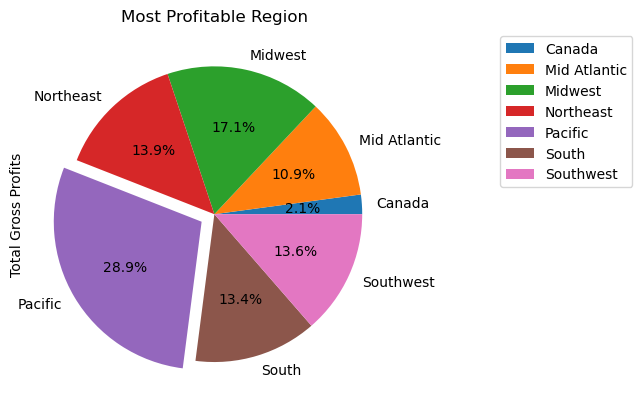

In [89]:
explode = [0, 0, 0, 0, 0.1, 0, 0]
per_region_candy_summary.plot.pie(y="Total Gross Profits", labels=per_region_candy_summary["Region"], explode=explode, autopct='%1.1f%%')
plt.title("Most Profitable Region")
plt.legend(bbox_to_anchor=(1.65, 1), loc="upper right")
plt.savefig("per_region_candy_summary.png", dpi=300, bbox_inches="tight")
plt.show()

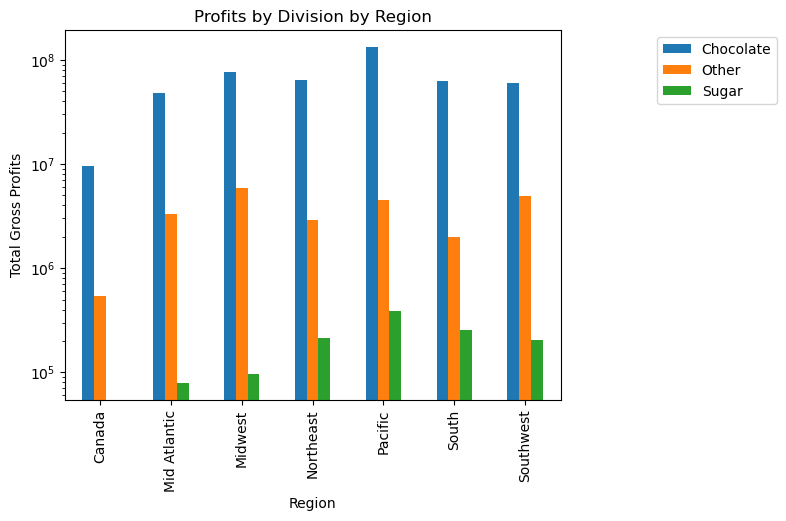

In [91]:
barwidth = 0.30
pivot_table = per_region_candy.pivot_table(index="Region", columns="Division", values="Total Gross Profits", aggfunc="sum")
ax = pivot_table.plot(kind="bar", stacked=False)
ax.set_yscale("log")
plt.xlabel("Region")
plt.ylabel("Total Gross Profits")
plt.title("Profits by Division by Region")
plt.legend(bbox_to_anchor=(1.45, 1), loc="best")
plt.savefig("pivot_table.png", dpi=300, bbox_inches="tight")
plt.show()